## Introduction

files needed = ('chile.xlsx', 'data1.csv', 'data2.csv', 'data3.csv', 'data4.csv')

This week we are working on

1. Seaborn
1. More on file paths
1. Using a loop to read many files 
1. Terminal commands

Takeaway from Wednesday: Why does plot design matter?

1. We need to consider how readers internalize our data
1. Poor design can lead to misinterpretation or be distracting
1. Not all data can be visualized with any plot type


# More on plotting

### The seaborn package
We matplotlib this week. This is a very low-level package, meaning that we have a lot of fine-grained control of the elements of our plots. I like fine-grained control because it means I can makes things look exactly how I want it. It also means that we have to type a lot of code to create a figure. 

Here, we introduce the *seaborn* package. Seaborn is written on top of matplotlib and automates some of the creation of plots. This can be very helpful, but remember **do not trust the defaults.** 

Seaborn also includes some plot types that are not easy to do in matplotlib. Great!

Today, we will cover: 
* `regplot()` which adds the line-of-best-fit to a scatter plot
* `jointplot()` which adds the marginal distributions to the axes

Along the way, we will take a look at the *World Development Indicators*.


In [1]:
import pandas as pd                    # our go-to for data handling                  
import matplotlib.pyplot as plt        # make plots, but doesn't automate much
import seaborn as sns                  # some new plot types, more automation

## World Development Indicators
The World Bank's [World Development Indicators](http://databank.worldbank.org/data/source/world-development-indicators) is a great source of economic and social data for many countries and many years. I have already downloaded output and consumption data for a few countries and saved it as 'wdi.csv'. 

The database is great: lots of variables, countries and time. I have extracted a small data file for Chile. The files that come out of the download facility are a mess. Let's clean them up.  

In [2]:
# I looked at the workbook and noticed the footer and that nas are '..'.
wdi = pd.read_excel('chile.xlsx', na_values='..', skipfooter=5)
wdi.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Chile,CHL,GDP (constant LCU),NY.GDP.MKTP.KN,1.593914e+13,1.677519e+13,1.745068e+13,1.846982e+13,1.894213e+13,1.912214e+13,...,125823838388000,1.325159e+14,137876215768070,1.403121e+14,1.435446e+14,1.460008e+14,147736095622350,153570668110240,155189982580250,NaN
1,Chile,CHL,Final consumption expenditure (constant LCU),NE.CON.TOTL.KN,1.335873e+13,1.402041e+13,1.461439e+13,1.515253e+13,1.513543e+13,1.529141e+13,...,93785024589700,9.908759e+13,103336792108318,1.062872e+14,1.090255e+14,1.128038e+14,116887472687087,121369080634627,122348544930031,NaN


There is a lot to not like about this DataFrame. 
* There are unneeded variables. 
* The unit of observation is a year, so the I want the years in the index.
* The year data are a mix of numbers and letters.


In [3]:
wdi = wdi.drop(['Country Name', 'Country Code', 'Series Code'], axis=1)
wdi.head()

,Series Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP (constant LCU),1.593914e+13,1.677519e+13,1.745068e+13,1.846982e+13,1.894213e+13,1.912214e+13,2.127075e+13,22039895161000,2.283157e+13,...,125823838388000,1.325159e+14,137876215768070,1.403121e+14,1.435446e+14,1.460008e+14,147736095622350,153570668110240,155189982580250,NaN
1,Final consumption expenditure (constant LCU),1.335873e+13,1.402041e+13,1.461439e+13,1.515253e+13,1.513543e+13,1.529141e+13,1.700241e+13,17541684272603,1.822511e+13,...,93785024589700,9.908759e+13,103336792108318,1.062872e+14,1.090255e+14,1.128038e+14,116887472687087,121369080634627,122348544930031,NaN


Cleaning up the dates is bit complicated but not impossible. I will slice each column name and take the first four characters. Then convert those first four characters to an `int`. The first column name is not a date, so I need to skip that.  

In [4]:
temp = [wdi.columns[0]] + [int(c[0:4]) for c in wdi.columns[1:]]
wdi.columns = temp
wdi.head()


,Series Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,GDP (constant LCU),1.593914e+13,1.677519e+13,1.745068e+13,1.846982e+13,1.894213e+13,1.912214e+13,2.127075e+13,22039895161000,2.283157e+13,...,125823838388000,1.325159e+14,137876215768070,1.403121e+14,1.435446e+14,1.460008e+14,147736095622350,153570668110240,155189982580250,NaN
1,Final consumption expenditure (constant LCU),1.335873e+13,1.402041e+13,1.461439e+13,1.515253e+13,1.513543e+13,1.529141e+13,1.700241e+13,17541684272603,1.822511e+13,...,93785024589700,9.908759e+13,103336792108318,1.062872e+14,1.090255e+14,1.128038e+14,116887472687087,121369080634627,122348544930031,NaN


Looking better! Let's set the 'Series Name' as the index and then transpose the DataFrame. We will learn more about reshaping data in the future. 

In [5]:
wdi = wdi.set_index('Series Name')
wdi = wdi.transpose()
wdi.head()

Series Name,GDP (constant LCU),Final consumption expenditure (constant LCU)
1960,1.593914e+13,1.335873e+13
1961,1.677519e+13,1.402041e+13
1962,1.745068e+13,1.461439e+13
1963,1.846982e+13,1.515253e+13
1964,1.894213e+13,1.513543e+13


In [6]:
wdi.columns = ['gdp_real', 'cons_real']
wdi.head()

,gdp_real,cons_real
1960,1.593914e+13,1.335873e+13
1961,1.677519e+13,1.402041e+13
1962,1.745068e+13,1.461439e+13
1963,1.846982e+13,1.515253e+13
1964,1.894213e+13,1.513543e+13


Lastly, let's compute the growth rates of real gdp and consumption. 

In [7]:
wdi_gr = wdi.pct_change()*100
wdi_gr.head()

,gdp_real,cons_real
1960,NaN,NaN
1961,5.245272,4.953131
1962,4.026686,4.236605
1963,5.840140,3.682199
1964,2.557221,-0.112808


### sns.regplot( )
Our go-to scatterplot in matplotlib does not offer an easy way to add a simple line of best fit. We can separately estimate the regression and then plot the fitted values, but seaborn provides a simple way to get that same look. 

The `regplot( )` function [(docs)](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) adds a fitted regression and confidence interval to a scatter.  

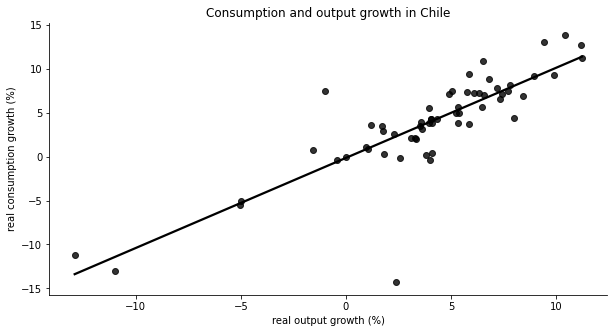

In [8]:
my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_real',                                        # column to put on x axis
            y='cons_real',                                       # column to put on y axis 
            data=wdi_gr,                                         # the data
            ax = my_ax,                                          # an axis object
            color = 'black',                                  
            ci = 0)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title('Consumption and output growth in Chile')
my_ax.set_ylabel('real consumption growth (%)')
my_ax.set_xlabel('real output growth (%)')

plt.show()

Looking good! The default regression spec is OLS, but you can specify a more complicated model. Interestingly, you *cannot* recover the coefficients (slope, intercept) of the estimated regression. The person who developed seaborn is apparently [quite adamant](https://github.com/mwaskom/seaborn/issues/655) about this. 

Notice the different syntax seaborn exposes. 

```python 
sns.regplot(x, y, data, ax)
```

We do not pass the columns of data directly, like we would with matplotlib. Instead, we pass the DataFrame and the column names of the variables we want to plot. 

We can pass `regplot()` an axis object, `ax = my_ax` in the code above, to attach the plot to a specific axis. If we omit the ax argument, `regplot()` will create an axis object for us.  

### Confidence interval 

Let's specify a 95 percent *confidence interval*. 

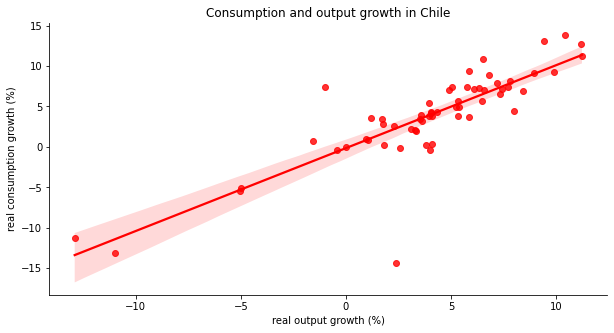

In [9]:
my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_real',                                        # column to put on x axis
            y='cons_real',                                       # column to put on y axis 
            data=wdi_gr,    # the data
            ax = my_ax,                                          # an axis object
            color = 'red',                                  
            ci = 95)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title('Consumption and output growth in Chile')
my_ax.set_ylabel('real consumption growth (%)')
my_ax.set_xlabel('real output growth (%)')

plt.show()

### sns.jointplot( )
`jointplot( )` adds the marginal distributions of the plotted variables to the axis of a regplot ([docs](https://seaborn.pydata.org/generated/seaborn.jointplot.html)). 

This may be useful for visualizing the marginal distributions, but **is it important that your reader see the marginal distributions? Is it telling them something important?** Potentially, but remember, just because you can do something, doesn't mean you always should. 

h is a <class 'seaborn.axisgrid.JointGrid'>


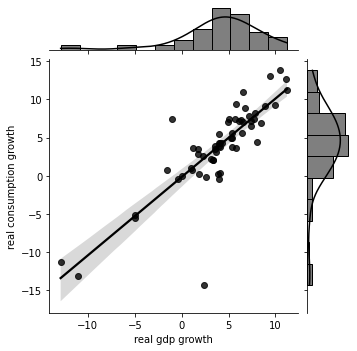

In [10]:
# Rather than call plt.subplots, let seaborn create the fig and axes.
# h is the axis-like object.

h = sns.jointplot(x='gdp_real', 
                  y='cons_real', 
                  kind='reg',                        # specify a regplot in the main plot area
                  data=wdi_gr,
                  ci=95, 
                  color = 'black',
                  height = 5                         # we can still control the figure size
                 )                                             

h.set_axis_labels('real gdp growth', 'real consumption growth')

# what is h?
print('h is a', type(h))

plt.show()

Notice that I did not start my figure by creating fig and axes objects. Instead, I let seaborn create the fig and axes for me. The return from `sns.jointplot()` is a JointGrid object created by seaborn. This is a more complicated figure, so it needs more complicated axes ojects. 


# Relative file paths

A common way to organize your projects is to keep your data files in a folder separate from your code and your output. This means that you will need to specify where your files are located. 

1. Get your current working directory. We did this in class using the `os` package. 

In [11]:
# 1. Get the current working directory.
import os
os.getcwd()

'/Users/mitchv34/Work/fundamentals-of-data-analytics-for-economists/sections/Week 5'

### Absolute paths
I could use 
```python
fname = os.getcwd()+'\\'+'data_files'+'\\'+'data1.csv'
```
and the variable `fname` would hold a string with the path to the file 'data1.csv'. Writing the path this way gives us the *absolute path* to the file. 

4. Use the absolute path approach to read data1.csv into a DataFrame. 

In [13]:
# 4. Read in the file with an absolute path.
import pandas as pd
df = pd.read_csv(os.getcwd()+'/'+'data_files'+'/'+'data1.csv')
df.head(2)

# Psst... I'm using a Mac, so I need to use '/' instead of '\\' for my paths

,id,income,consumption,savings
0,23,204471,204329.771,141.229
1,65,16852,16780.382,71.618


### Relative paths
Suppose you moved these files to another machine. Depending on how that machine is set up, the absolute path may not work any longer. For example, the drive letter (C:\, D:\, etc. ) you are working on may have changed. Now your code is broken!

We can construct a relative path to avoid these problems. A relative path specifies a path *relative to the current working directory*. We are using a relative path when we do not include any file path. For example, in

```python
df = pd.read_csv('data1.csv')
```

`read_csv()` is looking for the file 'data1.csv' in you current working directory. It will not find the file there, because the file is in the 'data_files' folder! Using a relative path, we start from our current working directory and go from there. So the file path in

```python
df = pd.read_csv('data_files\\data1.csv')
```

tells `read_csv()` to look for the file inside a folder named 'data_files' in the our current working directory.  

5. Use the relative path approach to read 'data1.csv' into a DataFrame.

In [15]:
# 5. Read in the file with a relative path.
df = pd.read_csv('data_files/data2.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/data2.csv'

6. Create a folder named 'inner_folder' **inside** your data_files folder. 
7. Move 'data2.csv' into the 'inner_folder'.
8. Use a relative path to read 'data2.csv' into a DataFrame.

In [16]:
# 8. Read in the file with a relative path through two levels of directories.  
df = pd.read_csv('data_files/inner_folder/data2.csv')

df.head()

,id,income,consumption,savings
0,59,32039,8191.577,23847.423
1,64,176379,31852.965,144526.035
2,12,211811,174631.343,37179.657
3,23,207987,65630.088,142356.912
4,58,25181,15231.614,9949.386


What if we need to reference a file in a folder that is not in our current working directory? We use `..` to tell the computer to look one folder-level "up". 

Let's try it out. Close this notebook and move it inside 'inner_folder'. Then reopen the notebook and come back to this line. Go ahead, I'll wait here. 

9. Now, use a 'run all above' to execute your notebook. The absolute path you created in 4. is now broken. 
10. What is your current working directory now? 

**Note**: In the notebook posted on Canvas, you can follow the steps to see the errors that pop up. In general, the issue is that we need to be careful about knowing the file structure and having it well-organized for any project that will be referring to outside files.

Suppose we want open 'data1.csv' which is not in our current working directory, but in the directory "above." We would use
```python
df = pd.read_csv('..\\data1.csv')
```
The `..` moves up one directory, so `read_csv()` is looking inside the 'data_files' folder for the file. 

11. Open 'data1.csv' using a relative path. 

In [20]:
os.listdir("data_files")

['data3.csv',
 'data2.csv',
 'data1.csv',
 'data4.csv',
 '.ipynb_checkpoints',
 'inner_folder']

In [ ]:
# I'm using os.chdir() to avoid having to close the notebook
os.chdir('./data_files/inner_folder/')
os.getcwd()

In [ ]:
# 11. Move up one directory to read in a file with a relative path.
df = pd.read_csv('../data1.csv')

## Using a loop to read files

One last problem to finish off your week...

1. Move 'data2.csv' back into 'data_files'. All four data files should be in the 'data_files' folder and this notebook should be in the 'inner_folder' folder. 

2. Use a loop and some string manipulation to create four DataFrames from the four data files. Assign the DataFrames to a dict with the keys `df1`, `df2`, `df3`, and `df4`.

In [31]:
# 2. Loop over the files and create a dict of DataFrames.

data = {}
for i in range(1,5):
    data[('df'+str(i))] = pd.read_csv('data_files/data'+str(i)+'.csv')
    
data

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/data2.csv'

In [22]:
data["df4"]

,id,income,consumption,savings
0,669,116394,12123.343,104270.657
1,325,146648,46512.304,100135.696
2,157,190551,33440.872,157110.128
3,486,152690,48956.518,103733.482
4,257,102242,15887.382,86354.618
5,45,212326,73472.489,138853.511
6,331,174550,129466.324,45083.676
7,444,136192,126132.148,10059.852
8,7821,36210,4657.947,31552.053


In [30]:
file_list = [f for f in os.listdir("data_files") if ".csv" in f]
n_files = len(file_list)

data = {}
for i in range(1, n_files+1):
    data[('df'+str(i))] = pd.read_csv("data_files/" + file_list[i-1])

    
data

{'df1':      id  income  consumption     savings
 0   223   35406    21571.807   13834.193
 1   125  177165   100536.467   76628.533
 2   168  132733   123220.058    9512.942
 3   598  114676    65546.545   49129.455
 4  2034  188296    40230.724  148065.276
 5   189   49811    35265.918   14545.082
 6   780   49692    12289.417   37402.583
 7    22   48885    24167.810   24717.190
 8   364  212631   179785.926   32845.074,
 'df2':     id  income  consumption     savings
 0   23  204471   204329.771     141.229
 1   65   16852    16780.382      71.618
 2  459   36218     3228.659   32989.341
 3   87   22556    16031.510    6524.490
 4   12   83973    77247.362    6725.638
 5   36  243940   150455.903   93484.097
 6  105   38408    36615.958    1792.042
 7  980  213284    97064.964  116219.036
 8   25  149592   137153.440   12438.560,
 'df3':      id  income  consumption     savings
 0   669  116394    12123.343  104270.657
 1   325  146648    46512.304  100135.696
 2   157  190551    3

## Terminal

Now that we understand some things about navigating computer files via code, it makes sense to discuss applying this knowledge outside of Python and Jupyter. The `os` commands you've seen are derivative of *shell* nomenclature, which is used by many different applications and coding languages behind the scenes.

When you launch Jupyter, you may notice that a strange window pops up with some cryptic messages about notebooks and such. This is a *shell*, and as you may have guessed, we can run one ourselves!


Open up the *Windows PowerShell* (Windows) or *Terminal* (Linux and Mac). While we are not using Python right now, having it in our arsenal will go very far, especially when learning about *compiled languages* or software development. You should see something like this: 

`PS C:\Users\valdsbobes>`

Now hit the following two keys and press Return: `ls`

What do you see?

Okay, so we've seen `ls`. If you're ever wondering what files are actually *in* the folder you're working with, it can be very helpful to use `ls`, particularly so you can see what your computer is seeing. If you're in the top-level directory of your computer, particularly on WinStat, you probably see something like Contacts, Downloads, ... Yep, these are folders! Let's change our directory to our U drive with

`cd U:`

Now what can you see with `ls`? Try moving into another folder.

Want to go back? Use `cd ../`. This moves us "up" one level in the file system. 

Tip: To easily find the path to a particular folder, you can drag the folder into the Terminal window. This works on both Mac and Windows.

Now let's play around with these commands a bit. Use `mkdir test` to make a new folder named "test" in your current directory. Then, move into your new folder, type `python`, then press Return again. You should now see some new lines as your computer boots up the Python language, all inside this window!

This may seem useless, but I like to keep a Terminal window handy to test bits of code while I work.

You can explore a lot of these commands using [SS64](https://ss64.com/). I also have [this](http://mally.stanford.edu/~sr/computing/basic-unix.html) and [this](https://www.tjhsst.edu/~dhyatt/superap/unixcmd.html) bookmarked, because it's tough to remember all of these! Microsoft also maintains a Powershell commands list [here](https://devblogs.microsoft.com/scripting/table-of-basic-powershell-commands/). 

Note that there are some differences between Windows (which is "BSD") and Linux/Mac (which are "Unix"). [Learn about BSD vs Unix here](https://unix.stackexchange.com/questions/104714/what-is-the-difference-between-unix-linux-bsd-and-gnu), and [here](https://appuals.com/difference-unix-vs-linux-vs-bsd/). One of the major  (cosmetic) ones is that Windows uses both a `\` and `/`, while Mac only uses `/` in its file paths.

## Some notes on using Terminal

It is *extremely* dangerous to use Terminal commands recklessly. Commands like `sudo` and `rm` must be used with precision and care, or you can do things like [accidentally delete everything, including the terminal itself](https://www.ee.ryerson.ca/~elf/hack/recovery.html). 

Outside of file manipulation, my most common uses of terminal are:

* Sending files to and from school servers using `sftp`
* LinStat server usage
* editing text files with `nano` and `vim`
* Running compiled code in languages like C or Rust - you can do this in Python, too!
* Installing and running software through [homebrew](https://brew.sh/)
* GitHub

## Exam Tips

* You may want to have your files for the class organized and ready to go before the exam starts
    * lecture, discussion notebooks, practice exam, homework assignments
* Python documentation is [here](https://docs.python.org/3.8/)
* Pandas documentation is [here](https://pandas.pydata.org/docs/)
* Try making a study guide- make a Jupyter notebook that has some tips and tricks organized together so that you can refer back to it as needed during the exam
* Do **not** work together on the exam

In [32]:
# Example function 

def my_function(arg):
    # Dont forget the ":" at the end 
    # Here goes the code
    
    #Example
    arg = arg + 1
    
    # If I want arg back 
    return arg

my_function(34)

35